### Set Up

In [269]:
# Installing the Packages

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Set the display format for floats

In [270]:
# Setting the Seed (pandas, statsmodels, matplotlib and y_data_profiling rely on numpy's random generator, and thus, we need to set the seed in numpy)
seed = 2024
np.random.seed(seed)

# Set the display format for floats
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

In [271]:
# Importing the data 
diet_df = pd.read_csv("diet.csv")
recipes_df = pd.read_csv("recipes.csv")
requests_df = pd.read_csv("requests.csv")
reviews_df = pd.read_csv("reviews.csv")

/var/folders/_4/9t_lhqh15ps7xbdf5qrr2sg40000gn/T/ipykernel_63894/1271822651.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_df = pd.read_csv("reviews.csv")


In [272]:
print("Diet Shape: ", diet_df.shape)
print("Recipes Shape: ", recipes_df.shape)
print("Requests Shape: ", requests_df.shape)
print("Reviews Shape: ", reviews_df.shape)

Diet Shape:  (271907, 3)
Recipes Shape:  (75604, 18)
Requests Shape:  (140195, 8)
Reviews Shape:  (140195, 5)


### Cleaning Diet ✅

In [273]:
diet_df

,AuthorId,Diet,Age
0,10000120E,Vegetarian,46
1,1000014D,Vegan,18
2,1000015A,Vegetarian,58
3,1000016E,Vegetarian,32
4,1000027E,Vegan,61
...,...,...,...
271902,999917E,Vegetarian,28
271903,999936C,Omnivore,22
271904,99993D,Vegetarian,58
271905,99994A,Vegetarian,18


In [274]:
# Clean Diet
diet_cleaned = diet_df 

# Replace the missing values with the most common diet
diet_cleaned.loc[diet_df["AuthorId"] == "646062A", "Diet"] = "Vegetarian"

# Dummy Encode the diet column
diet_cleaned = pd.get_dummies(diet_cleaned, columns=["Diet"], prefix=["Diet"], drop_first=True)

diet_cleaned

,AuthorId,Age,Diet_Vegan,Diet_Vegetarian
0,10000120E,46,False,True
1,1000014D,18,True,False
2,1000015A,58,False,True
3,1000016E,32,False,True
4,1000027E,61,True,False
...,...,...,...,...
271902,999917E,28,False,True
271903,999936C,22,False,False
271904,99993D,58,False,True
271905,99994A,18,False,True


### Cleaning Recipes

In [275]:
recipes_df.head()
recipes_cleaned = recipes_df.copy()

recipes_df["Calories"].describe()

count    75604.00
mean       487.58
std       1496.38
min          0.00
25%        174.70
50%        318.10
75%        530.40
max     350473.10
Name: Calories, dtype: float64

In [276]:
import re

vegetables = 'carrot|potato|tomato|onion|garlic|broccoli|spinach|cucumber|lettuce|celery|cabbage|cauliflower|corn|pepper|peas|beans|asparagus|eggplant|zucchini|squash|pumpkin|radish|beet|turnip|sprouts|vegetable|vegetables|kale|bell pepper|sweet potato|cherry tomato|artichoke|bok choy|brussels sprouts|butternut squash|leek|okra|snow peas|snap peas|green beans|fennel|watercress|arugula|chard|collard greens|endive|escarole|kohlrabi|mustard greens|pattypan squash|romanesco broccoli|rutabaga|sugar snap peas|swiss chard|tatsoi|water chestnut|yam|daikon|lotus root|bamboo shoots|jicama|plantain|radicchio|turnip greens|water spinach|bitter melon|chayote|chicory|dandelion greens|edamame|lotus root|nopales|portobello mushroom|shiitake mushroom|maitake mushroom|enoki mushroom|oyster mushroom|mushroom|zucchini blossom|artichoke|sunchoke|beets|cardoon|salsify|kale|endive|acorn squash|alfalfa sprout|amaranth|anise|arracacha|arrowroot|aubergine|avocado|azuki bean|banana squash|barbarea verna|basil|bean sprout|beet greens|belgian endive|bell pepper|black bean|black-eyed pea|borage|broad bean|broccoflower|broccolini|brussels sprout|butter lettuce|butternut lettuce|cactus|calabash|camas root|canna|cape gooseberry|caper|cardinal bean|cassava|catsear|cauliflower|cayenne pepper|celeriac|celtuce|chayote|cherry pepper|chickpea|chicory|chili pepper|chinese artichoke|chinese broccoli|chinese cabbage|chinese mallow|chive|cilantro|collard|common bean|courgette|courgette flower|cowpea|cress|crookneck squash|cucumber|daikon|delicata squash|dill|drumstick|earthnut pea|elephant garlic|endive|epazote|fava bean|fennel|fenugreek|fluted pumpkin|french bean|frisee|garbanzo|gem squash|ginger|golden samphire|good king henry|grape leaves|green bean|green soybean|guar|habanero|haricot bean|horseradish|hubbard squash|hyacinth bean|iceberg lettuce|jerusalem artichoke|jicama|jute|kai-lan|kidney bean|kohlrabi|komatsuna|kombu|kuka|lacinto|lagos bologi|land cress|laver|leek|lemon grass|lentil|lettuce|lima bean|linguica|lo bok|lotus root|luffa|mache|malabar spinach|mangetout|mizuna greens|molokhia|monstera|morel|morogo|mung bean|mustard|napa cabbage|new zealand spinach|nopale|oceanic whitetip shark|okra|onion|oregano|orache|pak choy|paprika|parsley|parsnip|pea|peanut|pearl onion|pigeon pea|pignut|pimento|pinto bean|pisello|plantain|poblano|pokeweed|potato|prairie turnip|pumpkin|purslane|radicchio|radish|rape|rapini|raspberry|red bean|red cabbage|red pepper|rhubarb|ricebean|rocket|romanescu|romano bean|rosemary|runner bean|rutabaga|rye|saffron|sage|salad savoy|salsify|samphire|scallion|scarlet runner bean|sea kale|seakale beet|sesame|shallot|shiitake|skirret|sloe|snake bean|snow pea|sorrel|sour cherry|southern pea|soybean|spaghetti squash|spinach|spring onion|squash|squash blossom|swede|sweet corn|sweet pepper|sweet potato|swiss chard|taro|tatsoi|thyme|tomatillo|tomato|topinambour|tubers|turmeric|turnip|turnip greens|ugli fruit|ursolic acid|uva-ursi|vates|water chestnut|water spinach|watercress|wax bean|wax gourd|welsh onion|west indian gherkin|white bean|white radish|wild leek|wild rice|winged bean|winter melon|winter squash|yam bean|yardlong bean|yellow squash|yu choy|zucchini'
meats = 'chicken|beef|pork|lamb|turkey|duck|goose|fish|seafood|salmon|shrimp|crab|lobster|ham|bacon|sausage|meat|steak|veal|venison|bison|liver|lamb|poultry|meat|tuna|mackerel|trout|haddock|cod|catfish|tilapia|sardine|anchovy|halibut|swordfish|monkfish|eel|octopus|squid|clams|mussels|oysters|snail|game|partridge|pheasant|quail|rabbit|hare|wild boar|elk|moose|reindeer|buffalo|ostrich|emu|kangaroo|alligator|frog legs|snapper|grouper|barracuda|carp|pike|perch|flounder|sole|mahi mahi|red snapper|swordfish|branzino|char|chub|mullet|ray|skate|sturgeon|turbot|whiting|arctic char|caviar|roe|scallop|sea urchin|abalone|crayfish|langoustine|prawn|cuttlefish|jellyfish|stingray|barramundi|black cod|bluefish|bonito|bream|burbot|butterfish|capelin|chimaera|conger|coral trout|dab|dace|dogfish|dorado|dory|drum|escolar|garfish|gilt-head bream|hake|herring|John Dory|kingfish|lamprey|lingcod|lumpsucker|marlin|milkfish|nile perch|northern pike|orange roughy|pacific saury|patagonian toothfish|pollock|pomfret|pompano|rockfish|rudd|sablefish|sanddab|sculpin|sea bass|shark|sheepshead|silver carp|skipjack tuna|smelt|snook|sockeye salmon|sole|sprat|striped bass|sturgeon|surimi|tarpon|tench|wahoo|walleye|warmouth|weakfish|whitebait|whitefish|yellowtail|zebrafish'
dairy = 'milk|cheese|yogurt|cream|butter|buttermilk|sour cream|cottage cheese|mascarpone|ricotta|cream cheese|mozzarella|cheddar|brie|feta|parmesan|gouda|havarti|blue cheese|goat cheese|swiss cheese|provolone|muenster cheese|asiago|colby jack|mozzarella sticks|queso fresco|queso blanco|halloumi|neufchâtel|ghee|clotted cream'
fruits = 'apple|banana|orange|grape|strawberry|blueberry|raspberry|blackberry|cherry|peach|pear|plum|pineapple|kiwi|lemon|lime|grapefruit|cantaloupe|watermelon|pomegranate|nectarine|apricot|fig|guava|lychee|mango|papaya|persimmon|star fruit|tangerine|dragon fruit|passion fruit|jackfruit|durian|breadfruit|quince|cranberry|currant|elderberry|gooseberry|boysenberry|lingonberry|mulberry|olive|date|prune|raisin|clementine|kumquat|tangelo|blood orange|carambola|loquat|ugli fruit|breadfruit|cherimoya|custard apple|guanabana|guava|horned melon|jujube|kiwano|kumquat|longan|lychee|mangosteen|marionberry|miracle fruit|papaya|persimmon|pomelo|quince|rambutan|sapodilla|tamarillo|tamarind|ugli fruit|yuzu|acai berry|ackee|araza|barbadine|bilberry|black sapote|blackcurrant|blueberry|boysenberry|breadfruit|canistel|cempedak|cherry|cloudberry|coconut|cranberry|cupuacu|currant|damson plum|durian|elderberry|feijoa|fig|goji berry|gooseberry|grape|grapefruit|guava|honeyberry|huckleberry|jabuticaba|jackfruit|jambul|jujube|juniper berry|kiwano|kiwi|kumquat|lemon|lime|lingonberry|loganberry|longan|loquat|lychee|mandarin orange|mango|marionberry|melon|mulberry|nectarine'
alcohol = 'beer|wine|vodka|gin|rum|tequila|whiskey|brandy|bourbon|scotch|cognac|liqueur|vermouth|sherry|port|sake|champagne|prosecco|cider|mead|absinthe|amaretto|aperol|aquavit|armagnac|bitters|campari|chartreuse|cointreau|creme de cacao|creme de menthe|curacao|drambuie|frangelico|grand marnier|kahlua|lillet|limoncello|maraschino|midori|pastis|pisco|sambuca|schnapps|sloe gin|st. germain|triple sec|vermouth|absinthe|amaretto|aperol|aquavit|armagnac|bitters|campari|chartreuse|cointreau|creme de cacao|creme de menthe|curacao|drambuie|frangelico|grand marnier|kahlua|lillet|limoncello|maraschino|midori|pastis|pisco|sambuca|schnapps|sloe gin|st. germain|triple sec|vermouth'
gluten_containing_grains = 'wheat|barley|rye|spelt|farro|kamut|triticale|bulgur|couscous|seitan|matzo|matzah|matzo meal|cake flour|pastry flour|bread flour|durum|semolina|einkorn|emmer|beer|ale|lager|porter|stout|malt|malt vinegar|soy sauce|teriyaki sauce|hoisin sauce|gravy|breadcrumbs|breaded|crouton|pretzel|pasta|noodle|gnocchi|dumpling|panko|sourdough|bagel|croissant|pita|naan|biscuit|scone|muffin|doughnut|pancake|waffle|pie crust|cake|pastry|cookie|brownie|cereal|granola|oats|oatmeal|oat bran|breakfast bars|communion wafer|play dough'
nuts_seeds = 'almond|brazil nut|cashew|chestnut|filbert|hazelnut|macadamia nut|pecan|pine nut|pistachio|walnut|peanut|sunflower seed|pumpkin seed|sesame seed|flaxseed|chia seed|poppy seed|hemp seed|safflower seed|black seed|pomegranate seed|grape seed|apricot kernel|prune kernel|coconut|almond butter|cashew butter|peanut butter|sunflower seed butter|pumpkin seed butter|tahini (sesame seed butter)|nut butter|macadamia butter|pistachio butter|walnut butter|hazelnut butter|chestnut flour|almond flour|coconut flour|sunflower seed flour|flaxseed meal|chia flour|poppy seed oil|hemp seed oil|grape seed oil|walnut oil|almond oil|hazelnut oil|macadamia oil|pecan oil|pine nut oil|pistachio oil|acorn|beechnut|butternut|hickory nut|lychee nut|mongongo nut|pili nut|shea nut|soap nut|tiger nut|colocynth|guarana|jack nut|kola nut|malabar chestnut|ogbono nut|paradise nut|sapucaia nut|souari nut|tonka bean'

#print('|'.join([f'{item}s?' for item in gluten_containing_grains.split('|')]))

def extract_ingredients(row, string):

    ingredients = row.split(',')
    cleaned_ingredients = [ingredient.replace('\\', '').replace('"', '').strip() for ingredient in ingredients]
    cleaned_ingredients = [ingredient.replace('c(', '') for ingredient in cleaned_ingredients]
    
    plural_string = '|'.join([f'{item}s?' for item in string.split('|')])

    count = 0
    for ingredient in cleaned_ingredients: 
        if bool(re.search(plural_string, ingredient, re.IGNORECASE)):
            #print(ingredient)
            #print(plural_string[0])
            #print(ingredient)
            count += 1

    #print(cleaned_ingredients)
    #print(vegetables_count)
    
    return count

recipes_cleaned['VegetableCount'] = recipes_cleaned['RecipeIngredientParts'].apply(lambda row: extract_ingredients(row, vegetables))
recipes_cleaned['MeatCount'] = recipes_cleaned['RecipeIngredientParts'].apply(lambda row: extract_ingredients(row, meats))
recipes_cleaned['DairyCount'] = recipes_cleaned['RecipeIngredientParts'].apply(lambda row: extract_ingredients(row, dairy))
recipes_cleaned['FruitsCount'] = recipes_cleaned['RecipeIngredientParts'].apply(lambda row: extract_ingredients(row, fruits))
recipes_cleaned['AlcoholCount'] = recipes_cleaned['RecipeIngredientParts'].apply(lambda row: extract_ingredients(row, alcohol))
recipes_cleaned['GlutenContainingGrainsCount'] = recipes_cleaned['RecipeIngredientParts'].apply(lambda row: extract_ingredients(row, gluten_containing_grains))
recipes_cleaned['NutsAndSeedsCount'] = recipes_cleaned['RecipeIngredientParts'].apply(lambda row: extract_ingredients(row, nuts_seeds))

In [277]:
# Drop the 'Name' column
recipes_cleaned.drop(columns=['Name'], inplace=True)

# Handling the Time columns 
recipes_cleaned["TotalTimeRequired"] = recipes_cleaned["CookTime"] + recipes_cleaned["PrepTime"]
recipes_cleaned.drop(["CookTime", "PrepTime"], axis=1, inplace=True)

# Handling the RecipeCategory column
recipes_cleaned = pd.get_dummies(recipes_cleaned, columns=['RecipeCategory'], drop_first=True)

# Handling the RecipeIngredientQuantities column
recipes_cleaned.drop(columns=['RecipeIngredientQuantities'], inplace=True)

# Handling the RecipeIngredientParts column
recipes_cleaned.drop(columns=['RecipeIngredientParts'], inplace=True)

# Handling the Calories column
#recipes_cleaned.loc[recipes_cleaned["Calories"] > 30000, "Calories"] = recipes_cleaned["Calories"].median()

# Handling the CholesterolContent column
#recipes_cleaned.drop(columns=['CholesterolContent'], inplace=True)

# Handling the SodiumContent column
#recipes_cleaned.drop(columns=['SodiumContent'], inplace=True)

# Handling the RecipeServings column
recipes_cleaned.drop(columns=['RecipeServings'], inplace=True)

# Handling the RecipeYield column
recipes_cleaned.drop(columns=['RecipeYield'], inplace=True)


# FatContent, SaturatedFatContent, CarbohydrateContent, FiberContent, SugarContent, ProteinContent

# FatContent
recipes_cleaned.loc[recipes_cleaned["FatContent"] > 100, "FatContent"] = recipes_cleaned["FatContent"].median()

# SaturatedFatContent
recipes_cleaned.loc[recipes_cleaned["SaturatedFatContent"] > 100, "SaturatedFatContent"] = recipes_cleaned["SaturatedFatContent"].median()

# CarbohydrateContent
recipes_cleaned.loc[recipes_cleaned["CarbohydrateContent"] > 100, "CarbohydrateContent"] = recipes_cleaned["CarbohydrateContent"].median()

# FiberContent
recipes_cleaned.loc[recipes_cleaned["FiberContent"] > 100, "FiberContent"] = recipes_cleaned["FiberContent"].median()

# SugarContent
recipes_cleaned.loc[recipes_cleaned["SugarContent"] > 100, "SugarContent"] = recipes_cleaned["SugarContent"].median()

# ProteinContent
recipes_cleaned.loc[recipes_cleaned["ProteinContent"] > 100, "ProteinContent"] = recipes_cleaned["ProteinContent"].median()


In [278]:

# Berechne die Summe der Nährwerte und ersetze 0 durch 1
recipes_cleaned['WeightFromNutrition'] = recipes_cleaned['FatContent'] + recipes_cleaned['CarbohydrateContent'] + recipes_cleaned['FiberContent'] + recipes_cleaned['SugarContent'] + recipes_cleaned['ProteinContent']
recipes_cleaned['WeightFromNutrition'] = recipes_cleaned['WeightFromNutrition'].replace(0, 1)

# Berechne die Prozentanteile
recipes_cleaned['FatPercentage'] = recipes_cleaned['FatContent'] / recipes_cleaned['WeightFromNutrition']
recipes_cleaned['CarbohydratePercentage'] = recipes_cleaned['CarbohydrateContent'] / recipes_cleaned['WeightFromNutrition']
recipes_cleaned['FiberPercentage'] = recipes_cleaned['FiberContent'] / recipes_cleaned['WeightFromNutrition']
recipes_cleaned['SugarPercentage'] = recipes_cleaned['SugarContent'] / recipes_cleaned['WeightFromNutrition']
recipes_cleaned['ProteinPercentage'] = recipes_cleaned['ProteinContent'] / recipes_cleaned['WeightFromNutrition']

recipes_cleaned['CaloriesPerWeight'] = recipes_cleaned['Calories'] / recipes_cleaned['WeightFromNutrition']
recipes_cleaned.loc[recipes_cleaned['CaloriesPerWeight'] > 400, 'CaloriesPerWeight'] = 400


recipes_cleaned
recipes_cleaned['FiberPercentage'].describe()
#sns.scatterplot(recipes_cleaned['FiberPercentage'])


count   75604.00
mean        0.04
std         0.04
min         0.00
25%         0.01
50%         0.03
75%         0.06
max         0.50
Name: FiberPercentage, dtype: float64

In [279]:
# Entferne die angegebenen Spalten in-place
recipes_cleaned.drop(columns=['SaturatedFatContent', 'CholesterolContent', 'SodiumContent'], inplace=True)
#recipes_cleaned.drop(columns=['FatContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent'], inplace=True)
#recipes_cleaned.drop(columns=['Calories'], inplace=True)

#### Cleaning Requests ✅

In [280]:
requests_df.head()
requests_cleaned = requests_df.copy()

In [281]:
# Handling the Time Column 
# Replace negative values in the Time Column with a very high number
requests_cleaned.loc[requests_cleaned["Time"] < 0, "Time"] = 1000000000000000000

# Handling the HighCalories column 
requests_cleaned['HighCalories'] = requests_df['HighCalories'].astype('int')

# Handling the HighProtein column
requests_cleaned['HighProtein'] = requests_df['HighProtein'].map({'Yes': 1, 'Indifferent': 0})

# Handling the LowFat column

# Handling the LowSugar column
requests_cleaned['LowSugar'] = requests_df['LowSugar'].map({'0': 1, 'Indifferent': 0})

requests_cleaned


,AuthorId,RecipeId,Time,HighCalories,HighProtein,LowFat,LowSugar,HighFiber
0,2001012259B,73440,1799.95,0,0,0,1,0
1,437641B,365718,4201.82,0,1,0,0,1
2,1803340263D,141757,6299.86,0,0,1,0,0
3,854048B,280351,19801.37,0,1,1,1,1
4,2277685E,180505,5400.09,0,0,0,1,0
...,...,...,...,...,...,...,...,...
140190,163793B,78171,1560.65,0,0,0,1,1
140191,33888B,333262,1502.01,1,0,1,1,0
140192,401942C,49200,5999.27,0,0,0,1,1
140193,346866B,214815,899.52,0,1,1,0,1


#### Cleaning Reviews ✅

In [282]:
reviews_df.head()
reviews_cleaned = reviews_df.copy()

In [283]:
# Handling the Rating Column 
# Replace the missing values with 0
reviews_cleaned['Rating'].fillna(0, inplace=True)

#reviews_cleaned.drop(columns=['Rating'], inplace=True)

# Handling the Like Column 
reviews_cleaned['Like'] = reviews_cleaned['Like'].map({True: 1, False: 0})


# Handling the TestSetId Column

reviews_cleaned



,AuthorId,RecipeId,Rating,Like,TestSetId
0,2492191A,33671,2.00,NaN,1.00
1,2002019979A,92647,2.00,NaN,2.00
2,408594E,161770,0.00,NaN,3.00
3,2001625557E,108231,2.00,NaN,4.00
4,2001427116E,71109,0.00,NaN,5.00
...,...,...,...,...,...
140190,999595E,338070,2.00,0.00,NaN
140191,999774A,29002,2.00,0.00,NaN
140192,999774A,159252,0.00,0.00,NaN
140193,999774A,1171,2.00,1.00,NaN


#### Data Merging

In [284]:
requests_df.head()

,AuthorId,RecipeId,Time,HighCalories,HighProtein,LowFat,LowSugar,HighFiber
0,2001012259B,73440,1799.95,0.00,Indifferent,0,0,0
1,437641B,365718,4201.82,0.00,Yes,0,Indifferent,1
2,1803340263D,141757,6299.86,0.00,Indifferent,1,Indifferent,0
3,854048B,280351,19801.37,0.00,Yes,1,0,1
4,2277685E,180505,5400.09,0.00,Indifferent,0,0,0


In [285]:
print("Diet Shape: ", diet_cleaned.shape)
print("Recipes Shape: ", recipes_cleaned.shape)
print("Requests Shape: ", requests_cleaned.shape)
print("Reviews Shape: ", reviews_cleaned.shape)

Diet Shape:  (271907, 4)
Recipes Shape:  (75604, 28)
Requests Shape:  (140195, 8)
Reviews Shape:  (140195, 5)


In [286]:
full_df = pd.merge(requests_cleaned, reviews_cleaned, on=['RecipeId', 'AuthorId'])
full_df = pd.merge(full_df, recipes_cleaned, on=['RecipeId'])
full_df = pd.merge(full_df, diet_cleaned, on=['AuthorId'])

print(full_df.shape)

full_df.loc[full_df["RecipeId"] == 133043]

full_df.dtypes


(140195, 41)


AuthorId                         object
RecipeId                          int64
Time                            float64
HighCalories                      int64
HighProtein                       int64
LowFat                            int64
LowSugar                          int64
HighFiber                         int64
Rating                          float64
Like                            float64
TestSetId                       float64
Calories                        float64
FatContent                      float64
CarbohydrateContent             float64
FiberContent                    float64
SugarContent                    float64
ProteinContent                  float64
VegetableCount                    int64
MeatCount                         int64
DairyCount                        int64
FruitsCount                       int64
AlcoholCount                      int64
GlutenContainingGrainsCount       int64
NutsAndSeedsCount                 int64
TotalTimeRequired                 int64


### Full DF Data Engineering

In [287]:
# Cross Data Engineernig 

# TimeRequestFulfilled -> 1, if TotalTime is less Time
full_df = full_df.assign(TimeRequestFulfilled = np.where(full_df['TotalTimeRequired'] <= full_df['Time'], 1, 0))

# VegetarianRequestFulfilled -> 1, if Diet_Vegetarian is 1 and ProteinContent is in the 0.5 quantile
#full_df = full_df.assign(VegetarianRequestFulfilled = np.where((full_df['Diet_Vegetarian'] == 1) & (full_df['MeatCount'] == 0), 1, 0))

# VeganRequestFulfilled -> 1, if Diet_Vegan is 1 and ProteinContent is in the 0.5 quantile
#full_df = full_df.assign(VeganRequestFulfilled = np.where((full_df['Diet_Vegan'] == 1) & (full_df['MeatCount'] == 0) & (full_df['DairyCount'] == 0), 1, 0))



# High Calories -> 1, if HighCalories is 1 and if CaloriesContent is more than 500 
full_df = full_df.assign(HighCaloriesRequestFulfilled = np.where((full_df["HighCalories"] == 1) & (full_df['Calories'] >= 300), 1, 0))
#full_df = full_df.assign(HighCaloriesRequestFulfilled = np.where((full_df["HighCalories"] == 1) & (full_df['CaloriesPerWeight'] >= 5.1), 1, 0))

# LowFatRequestFulfilled -> 1, if LowFat is 1, and FatContent is less than 3
full_df = full_df.assign(LowFatRequestFulfilled = np.where((full_df['LowFat'] == 1) & (full_df['FatContent'] < 13), 1, 0))
#full_df = full_df.assign(LowFatRequestFulfilled = np.where((full_df['LowFat'] == 1) & (full_df['FatPercentage'] < 0.05), 1, 0))

# HighProteinRequestFulfilled -> 1, if ProteinContent is more than 25 
full_df = full_df.assign(HighProteinRequestFulfilled = np.where((full_df["HighProtein"] == 1) & (full_df['ProteinContent'] >= 25), 1, 0))
#full_df = full_df.assign(HighProteinRequestFulfilled = np.where((full_df["HighProtein"] == 1) & (full_df['ProteinPercentage'] >= 0.06), 1, 0))

# LowSugarRequestFulfilled -> 1, if LowSugar is 1, and SugarContent is less than 5
full_df = full_df.assign(LowSugarRequestFulfilled = np.where((full_df['LowSugar'] == 1) & (full_df['SugarContent'] < 6), 1, 0))
#full_df = full_df.assign(LowSugarRequestFulfilled = np.where((full_df['LowSugar'] == 1) & (full_df['SugarPercentage'] < 0.05), 1, 0))

# HighFiberRequestFulfilled -> 1, if FiberContent is more than 10
full_df = full_df.assign(HighFiberRequestFulfilled = np.where((full_df['FiberContent'] >= 4.5), 1, 0))
#full_df = full_df.assign(HighFiberRequestFulfilled = np.where((full_df['FiberPercentage'] >= 0.06), 1, 0))



# VegeterianRequestFulfilled -> 1, if Diet_Vegetarian is 1 and MeatCount is 0
full_df = full_df.assign(VegeterianRequestNotFulfilled = np.where((full_df['Diet_Vegetarian'] == 1) & (full_df['MeatCount'] != 0), 1, 0))

# VeganRequestFulfilled -> 1, if Diet_Vegan is 1 and MeatCount is 0 and DairyCount is 0
full_df = full_df.assign(VeganRequestNotFulfilled = np.where((full_df['Diet_Vegan'] == 1) & ((full_df['MeatCount'] != 0) | (full_df['DairyCount'] != 0)), 1, 0))

# OmnivoreRequestFulfilled -> 1, if Diet_Vegan is 0 and Diet_Vegetarian is 0 and MeatCount is not 0
full_df = full_df.assign(OmnivoreRequestFulfilled = np.where((full_df['Diet_Vegan'] == 0) & (full_df['Diet_Vegetarian'] == 0) & (full_df['MeatCount'] != 0), 1, 0))

full_df["HighFiberRequestFulfilled"].value_counts() 



HighFiberRequestFulfilled
0    104675
1     35520
Name: count, dtype: int64

In [288]:
full_df.dtypes

AuthorId                          object
RecipeId                           int64
Time                             float64
HighCalories                       int64
HighProtein                        int64
LowFat                             int64
LowSugar                           int64
HighFiber                          int64
Rating                           float64
Like                             float64
TestSetId                        float64
Calories                         float64
FatContent                       float64
CarbohydrateContent              float64
FiberContent                     float64
SugarContent                     float64
ProteinContent                   float64
VegetableCount                     int64
MeatCount                          int64
DairyCount                         int64
FruitsCount                        int64
AlcoholCount                       int64
GlutenContainingGrainsCount        int64
NutsAndSeedsCount                  int64
TotalTimeRequire

In [289]:
full_df_submission = full_df[full_df["Like"].isnull()]
full_df_modelling = full_df[full_df["Like"].notnull()]

In [290]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score


#X = full_df_modelling.drop(["AuthorId", "RecipeId", "Like", "TestSetId"], axis=1)
#X = full_df_modelling.drop(["AuthorId", "Like", "TestSetId"], axis=1)
X = full_df_modelling.drop(["AuthorId", "RecipeId", "Time", "Calories", "Like", "TestSetId"], axis=1)
#X = full_df_modelling.drop(["AuthorId", "RecipeId", "Time", "Calories","FatPercentage", "CarbohydratePercentage", "FiberPercentage", "SugarPercentage", "CaloriesPerWeight" "Like", "TestSetId"], axis=1)

y = full_df_modelling["Like"]

X_train, X_test, y_train, y_test = \
  train_test_split(X, y,
                   test_size=0.3, 
                   shuffle=True,
                   random_state=seed)

In [291]:
# Run a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score

# Create the model
dt = DecisionTreeClassifier(random_state=seed)

# Fit the model
dt.fit(X_train, y_train)

predictions = dt.predict(X_test)

# Calculate the balanced accuracy score
balanced_accuracy_score(y_test, predictions)

0.7113048220468355

# Run a GradientBooster
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Create the model
gb = GradientBoostingClassifier(n_estimators=500)

# Fit the model
gb.fit(X_train, y_train)

predictions = gb.predict(X_test)

# Calculate the balanced accuracy score
balanced_accuracy_score(y_test, predictions)

In [298]:
# searching for best model
#   1. LogisticRegression
#   2. RandomForestClassifier
#   3. GradientBoostingClassifier
#   4. SVC/SVM  --> Powerful, particularly effective in high-dimensional spaces.
#   5. KNeighborsClassifier (KNN)   --> based on the majority of k-nearest neighbors.
#   6. DecisionTreeClassifier   --> based on the partitioning of the feature space.
#   7. GaussianNB (Naive Bayes) --> Simple probabilistic classifier based on Bayes's theorem.
#   8. MLPClassifier (Neural Network)   --> Multilayer Perceptron, a simple neural network.
#   9. K-Means  --> grouping data points into k clusters.

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# initialize models
model_logistic_regression = LogisticRegression(max_iter=1000)
model_random_forest = RandomForestClassifier()
model_gradient_boosting = GradientBoostingClassifier()
model_svm = SVC(max_iter=100)
model_knn = KNeighborsClassifier()
model_decision_tree = DecisionTreeClassifier(random_state=seed)
model_naive_bayes = GaussianNB()
model_nn = MLPClassifier(max_iter=1000)

# pipeline
pipeline = Pipeline(steps=[
                #            ("scaler", transform_scaler), 
                 #          ("pca", transform_pca),
                           ("model", None)
])

# choose PCA n_components
parameter_grid_preprocessing = {
  "pca__n_components" : [1, 2, 3, 4],
}

# Parameter grids for each model
parameter_grid_logistic_regression = {
  "model" : [model_logistic_regression],
  "model__C" : [0.1, 1, 10],  # inverse regularization strength
}

parameter_grid_gradient_boosting = {
  "model" : [model_gradient_boosting],
  "model__n_estimators" : [1000]
}

parameter_grid_random_forest = {
  "model" : [model_random_forest],
  "model__n_estimators" : [3, 50, 80],  # number of max trees in the forest
  "model__max_depth" : [None, 50, 100],
}

parameter_grid_svm = {
    "model": [model_svm],
    "model__C": [0.1, 1, 10],
    "model__kernel": ["linear", "rbf"],
}

parameter_grid_knn = {
    "model": [model_knn],
    "model__n_neighbors": [3, 5, 7],
}

parameter_grid_decision_tree = {
    "model": [model_decision_tree],
#    "model__criterion": ['gini', 'entropy'],
#    "model__max_depth": [None, 10, 50, 100],
#    "model__min_samples_split": [2, 5, 10],
#    "model__min_samples_leaf": [1, 2, 4],
}

parameter_grid_naive_bayes = {
    "model": [model_naive_bayes],
}

parameter_grid_nn = {
    "model": [model_nn],
    "model__hidden_layer_sizes": [(50, 50), (100,)],
}

# choose models for pipeline
meta_parameter_grid = [
             #           parameter_grid_logistic_regression,
                #       parameter_grid_gradient_boosting,
               #        parameter_grid_random_forest,
           #            parameter_grid_svm,
                 #      parameter_grid_knn,
                       parameter_grid_decision_tree,
              #         parameter_grid_naive_bayes,
              #         parameter_grid_nn
]

# choose whether preprocessing or not
#meta_parameter_grid = [{**parameter_grid_preprocessing, **model_grid}
#                       for model_grid in meta_parameter_grid]

search = GridSearchCV(pipeline,
                      meta_parameter_grid, 
                      scoring="balanced_accuracy",
                      n_jobs=8,     # number of kernels on your Mac
                      cv=5,         # number of folds for cross-validation 
                      error_score="raise"
)
# here, the actual training and grid search happens
search.fit(X_train, y_train.values.ravel())

print("best parameter:", search.best_params_ ,"(CV score=%0.3f)" % search.best_score_)

best parameter: {'model': DecisionTreeClassifier(random_state=2024)} (CV score=0.705)


In [296]:
# for a detailed look on the performance of the different models
def get_search_score_overview():
  for c,s in zip(search.cv_results_["params"],search.cv_results_["mean_test_score"]):
      print(c, s)

print(get_search_score_overview())
X_train

{'model': DecisionTreeClassifier(random_state=2024)} 0.7052897874745929
None


,HighCalories,HighProtein,LowFat,LowSugar,HighFiber,Rating,FatContent,CarbohydrateContent,FiberContent,SugarContent,...,Diet_Vegetarian,TimeRequestFulfilled,HighCaloriesRequestFulfilled,LowFatRequestFulfilled,HighProteinRequestFulfilled,LowSugarRequestFulfilled,HighFiberRequestFulfilled,VegeterianRequestNotFulfilled,VeganRequestNotFulfilled,OmnivoreRequestFulfilled
130538,1,1,0,1,0,0.00,2.50,21.90,0.90,0.30,...,True,1,0,0,0,1,0,0,0,0
134938,1,0,1,1,0,2.00,51.80,54.90,16.80,9.50,...,False,1,1,0,0,0,1,0,0,1
55042,0,1,0,1,0,2.00,21.40,65.70,0.20,62.20,...,True,0,0,0,0,0,0,0,0,0
125120,0,0,0,1,0,2.00,4.20,12.30,0.40,5.30,...,False,0,0,0,0,1,0,0,1,0
102628,1,1,1,1,1,2.00,6.80,8.40,0.20,7.20,...,True,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68864,1,0,0,1,1,0.00,0.30,10.80,1.10,9.50,...,True,1,0,0,0,0,0,0,0,0
52378,1,0,0,1,0,2.00,22.20,5.50,2.20,1.80,...,True,1,0,0,0,1,0,0,0,0
74631,1,0,0,1,0,2.00,7.20,19.70,4.30,9.20,...,True,0,0,0,0,0,0,0,0,0
76235,1,1,0,1,0,0.00,67.70,10.50,1.70,4.30,...,True,1,1,0,1,1,0,1,0,0


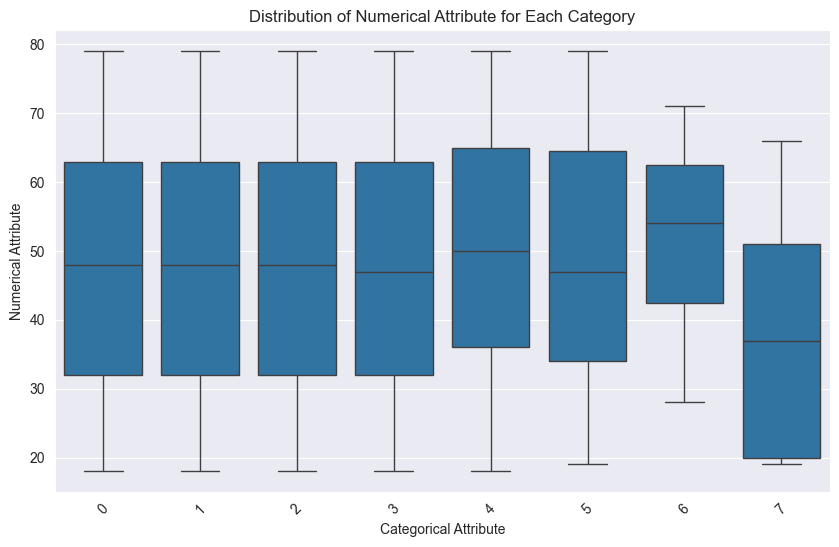

In [294]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='MeatCount', y='Age', data=full_df)
plt.title('Distribution of Numerical Attribute for Each Category')
plt.xlabel('Categorical Attribute')
plt.ylabel('Numerical Attribute')
plt.xticks(rotation=45)  # Useful if the labels are long or there are many categories
plt.show()